In [1]:
# @title imports

import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="ticks")

### Description

#### Point Neuron based Network Models

- simple Vanilla RNNs
  - input
  - hidden `h = f(w_xh, w_hh, x_t, h_t-1)`
  - output `y = g(w_hy, h_t)`
- LSTM
- GRU (Gated RNNs)
- Bi-directional RNNs

In [ ]:
## pytorch in build RNN class
### Efficient implementation equivalent to the following with bidirectional=False

rnn = nn.RNN(input_size=10, hidden_size=20, num_layers=2)

params = dict(rnn.named_parameters())

def forward(x, hx=None, batch_first=False):
    if batch_first:
        x = x.transpose(0, 1)
    seq_len, batch_size, _ = x.size()
    if hx is None:
        hx = torch.zeros(rnn.num_layers, batch_size, rnn.hidden_size)
    h_t_minus_1 = hx.clone()
    h_t = hx.clone()
    output = []
    for t in range(seq_len):
        for layer in range(rnn.num_layers):
            input_t = x[t] if layer == 0 else h_t[layer - 1]
            h_t[layer] = torch.tanh(
                input_t @ params[f"weight_ih_l{layer}"].T
                + h_t_minus_1[layer] @ params[f"weight_hh_l{layer}"].T
                + params[f"bias_hh_l{layer}"]
                + params[f"bias_ih_l{layer}"]
            )
        output.append(h_t[-1].clone())
        h_t_minus_1 = h_t.clone()
    output = torch.stack(output)
    if batch_first:
        output = output.transpose(0, 1)
    return output, h_t

In [ ]:
params.keys()

dict_keys(['weight_ih_l0', 'weight_hh_l0', 'bias_ih_l0', 'bias_hh_l0', 'weight_ih_l1', 'weight_hh_l1', 'bias_ih_l1', 'bias_hh_l1'])

In [ ]:
rnn = nn.RNN(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)

In [ ]:
class VanillaRNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(VanillaRNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        ### initialise

        ### load input data

        ### load output data

    def fwd_pass(self, X):
      ...

    def compute_loss():
      ...

    def

### LSTM

[back to top](#100)

#### LSTM tutorial

##### data

In [ ]:
## define data

x = torch.linspace(0,799,800) # an input tensor x
y = torch.sin(x*2*torch.pi/40) # an output tensor y which is sin(2*pi/40*x)

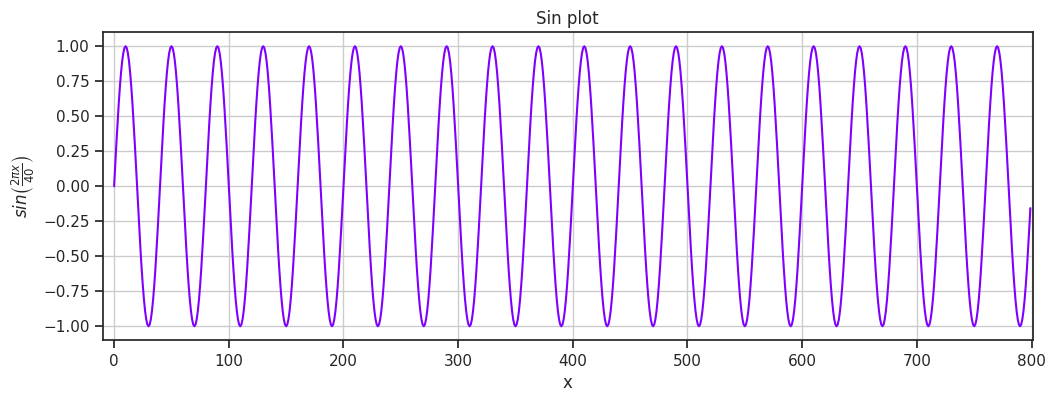

In [ ]:
### plot data

plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel(r"$sin \left( \frac{2 \pi x}{40} \right)$")
plt.title("Sin plot")
sns.lineplot(y.numpy(),color='#8000ff')
plt.show()

In [ ]:
## split for train and test data

test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]



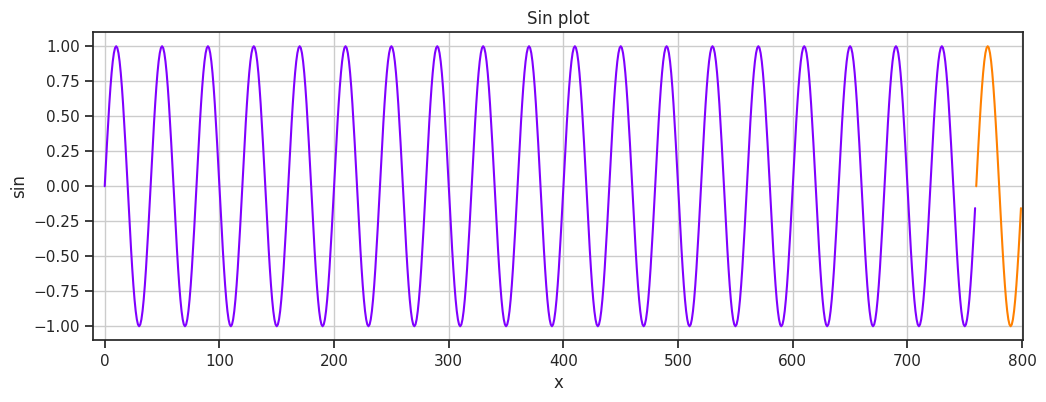

In [ ]:
### plot train and test split

plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sin")
plt.title("Sin plot")
plt.plot(train_set.numpy(),color='#8000ff')
plt.plot(range(760,800),test_set.numpy(),color="#ff8000")
plt.show()

In [ ]:
### data batching with sliding window to  train RNN across time

def input_data(seq,ws):
    out = []
    L = len(seq)

    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))

    return out